In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
df=pd.read_csv("houses_to_rent_v2.csv")
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa,rent amount,property tax,fire insurance,total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [4]:
min_thresold,max_thresold=df.total.quantile([0.001,0.999])
min_thresold,max_thresold

(558.691, 31186.13000000063)

In [5]:
# max_thresold=df.total.quantile([0.999])
# max_thresold

In [6]:
df[df.total < min_thresold]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1219,Porto Alegre,60,2,1,1,-,acept,not furnished,0,540,0,10,550
1847,Belo Horizonte,30,1,1,0,2,not acept,not furnished,0,550,0,8,558
4294,Belo Horizonte,20,1,1,0,1,not acept,not furnished,0,500,42,7,549
4868,Belo Horizonte,30,1,1,0,2,acept,not furnished,0,525,25,7,557
4950,Porto Alegre,60,2,1,1,-,acept,not furnished,0,540,0,10,550
5152,São Paulo,35,1,1,0,-,not acept,not furnished,0,500,0,8,508
5876,Rio de Janeiro,30,1,1,1,3,acept,not furnished,0,500,0,7,507
8183,Porto Alegre,30,1,1,0,-,not acept,not furnished,0,500,0,9,509
9317,Rio de Janeiro,30,1,1,1,3,acept,not furnished,0,500,0,7,507
10218,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,500,38,7,545


In [7]:
df[df.total > max_thresold]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40,11,32750
1699,São Paulo,700,4,4,4,-,acept,not furnished,0,10000,21880,151,32040
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
6185,São Paulo,455,4,5,4,5,acept,not furnished,8500,19500,3334,248,31580
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900


In [8]:
df2=df[(df.total < max_thresold) & (df.total > min_thresold)]
df2.shape

(10670, 13)

In [9]:
df2.to_csv('outlier_data.csv')

In [10]:
df2=pd.read_csv("outlier_data.csv")

In [11]:
#standard deviation to remove outliers
upper_limit=df2.total.mean()+4*df2.total.std()
upper_limit

22966.797865605047

In [12]:
#standard deviation to remove outliers
lower_limit=df2.total.mean()-4*df2.total.std()
lower_limit

-12581.107518838413

In [13]:
df2[(df2.total > upper_limit) | (df2.total < lower_limit)].head(30)

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
157,157,São Paulo,660,4,5,5,12,acept,furnished,4800,20000,1750,254,26800
230,230,São Paulo,480,4,6,5,9,acept,not furnished,6660,15000,3063,191,24910
254,254,São Paulo,530,5,6,4,2,acept,furnished,8300,15000,5000,191,28490
353,354,São Paulo,540,3,3,4,9,acept,not furnished,6200,15000,3500,191,24890
533,534,Belo Horizonte,548,4,7,6,17,acept,not furnished,5905,15000,2484,200,23590
546,547,São Paulo,580,5,5,4,4,acept,not furnished,9900,15000,2200,191,27290
721,722,São Paulo,620,4,6,4,1,acept,not furnished,8133,15000,4520,191,27840
815,816,Porto Alegre,367,3,4,4,8,not acept,not furnished,7000,15000,1032,220,23250
973,974,São Paulo,600,6,7,4,-,acept,furnished,10000,15000,84,226,25310
994,995,São Paulo,540,4,7,5,11,acept,not furnished,4922,15000,3565,191,23680


In [24]:
df3= df2[(df2.total < upper_limit) & (df2.total > lower_limit)]
df3

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,zscore
0,0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0.095680
1,1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0.625669
2,2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,-0.304231
3,3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,-0.848848
4,4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,-0.980501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10665,10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,-0.735198
10666,10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,3.165791
10667,10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,0.494466
10668,10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,1.986537


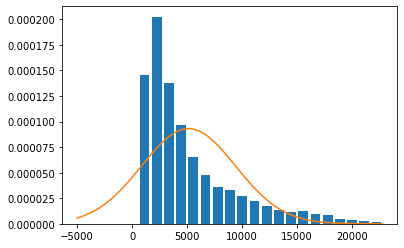

In [31]:
#plot histogram and bell curve 
plt.hist(df3.total,bins=20,rwidth=0.8,density=True)
rng=np.arange(-5000,df3.total.max(),100)
plt.plot(rng,norm.pdf(rng,df3.total.mean(),df3.total.std()))
plt.show()

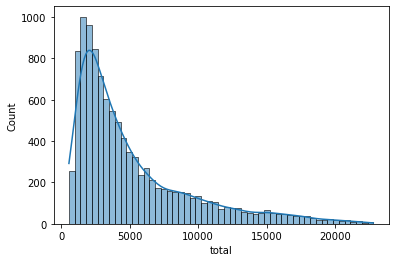

In [32]:
hist=sns.histplot(data=df3, x="total",kde=True)

In [17]:
df2["zscore"]=(df2.total - df2.total.mean())/df2.total.std()
df2.head(20)

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,zscore
0,0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0.095680
1,1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0.625669
2,2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,-0.304231
3,3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,-0.848848
4,4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,-0.980501
5,5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955,0.846667
6,6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750,-0.549758
7,7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253,0.463635
8,8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440,2.531154
9,9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955,-0.503624


In [18]:
df2[(df2.zscore>4) | (df2.zscore<-4)].shape

(36, 15)

In [19]:
no_outlier_zscore=df2[(df2.zscore<4) & (df2.zscore>-4)]
no_outlier_zscore

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,zscore
0,0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0.095680
1,1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0.625669
2,2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,-0.304231
3,3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,-0.848848
4,4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,-0.980501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10665,10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,-0.735198
10666,10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,3.165791
10667,10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,0.494466
10668,10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,1.986537


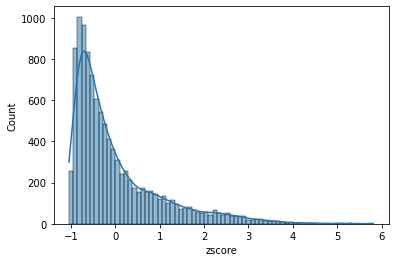

In [20]:
hist=sns.histplot(data=df2, x="zscore",kde=True)

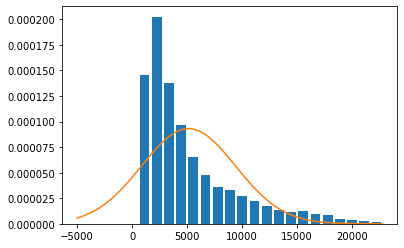

In [33]:
#plot histogram and bell curve 
plt.hist(no_outlier_zscore.total,bins=20,rwidth=0.8,density=True)
rng=np.arange(-5000,no_outlier_zscore.total.max(),100)
plt.plot(rng,norm.pdf(rng,no_outlier_zscore.total.mean(),no_outlier_zscore.total.std()))
plt.show()